# 효율적인 성능 평가 방법
- K-Fold Cross Validation을 사용해 모델의 성능을 예측 및 성능 평가하기

- DecisionTree, KNN, LogisticRegression

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = '../data/diabetes.csv'
data = pd.read_csv(path)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

# 1. 데이터 파악하기

In [3]:
# 데이터 살펴보기
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 기술통계 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. 데이터 전처리

**1) x, y 분리**

In [5]:
# Target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [6]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

In [7]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 성능 예측하기
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정한다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환한다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있다.

In [13]:
# 성능 기록하기
result=dict()

**1) Decision Tree**

In [14]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(max_depth=5,  random_state=1)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['DecisionTree'] = cv_score.mean()

[0.66666667 0.75925926 0.74074074 0.64814815 0.7037037  0.74074074
 0.75925926 0.81132075 0.79245283 0.67924528]
평균 : 0.7301537386443047
표준편차 : 0.05141448587329709


**2) KNN**

In [15]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

# 선언하기
model = KNeighborsClassifier()

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['KNN'] = cv_score.mean()

[0.64814815 0.68518519 0.72222222 0.64814815 0.72222222 0.74074074
 0.68518519 0.66037736 0.77358491 0.60377358]
평균 : 0.6889587700908455
표준편차 : 0.04846522080635871


**3) Logistic Regression**

- LogisticRegression 사용시 발생하는 Warning을 없애려면 충분한 max_iter를 지정한다.

In [18]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기
model = LogisticRegression()

# 검증하기
cv_score = cross_val_score(x_train, y_train, cv=10)

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['LogisticRegression'] = cv_score.mean()

TypeError: estimator should be an estimator implementing 'fit' method,      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
467            0       97             64             36      100  36.8   
550            1      116             70             28        0  27.4   
147            2      106             64             35      119  30.5   
481            0      123             88             37        0  35.2   
..           ...      ...            ...            ...      ...   ...   
645            2      157             74             35      440  39.4   
715            7      187             50             33      392  33.9   
72            13      126             90              0        0  43.4   
235            4      171             72              0        0  43.6   
37             9      102             76             37        0  32.9   

     DiabetesPedigreeFunction  Age  
88                      0.153   43  
467                     0.600   25  
550                     0.204   21  
147                     1.400   34  
481                     0.197   29  
..                        ...  ...  
645                     0.134   30  
715                     0.826   34  
72                      0.583   42  
235                     0.479   26  
37                      0.665   46  

[537 rows x 8 columns] was passed

# 4. 성능 비교하기

In [19]:
# 성능 확인하기
result

{'DecisionTree': 0.7301537386443047, 'KNN': 0.6889587700908455}

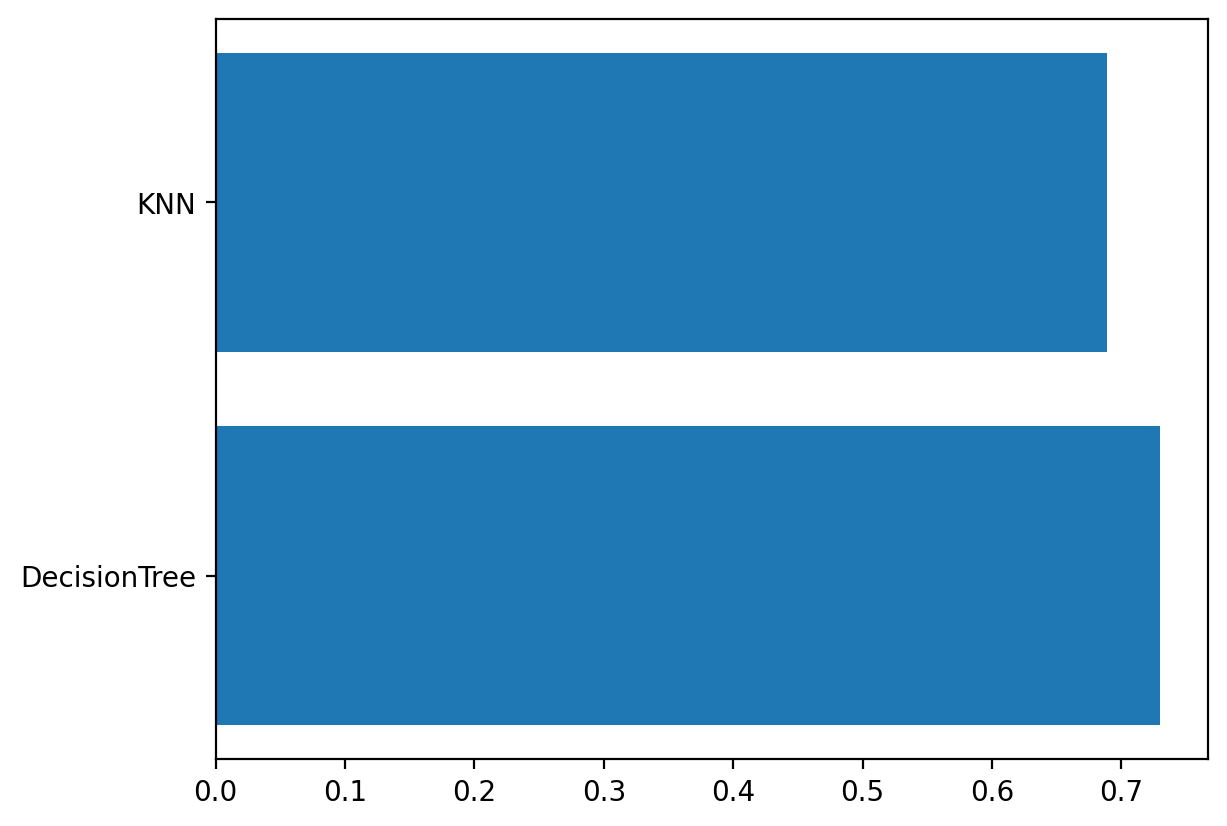

In [20]:
# 성능 비교 시각화
plt.barh(y=list(result), width=result.values())
plt.show()